## Notebook Template to Quickly Test Things Out

In [68]:
# General imports
import torch
import numpy as np
import os, sys
import json
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [102]:
# Local imports
sys.path.insert(0, 'src')
from utils import read_json, read_lists, write_lists, prepare_device, load_image
from utils.analysis import _get_k_nearest_neighbors as get_k_nearest_neighbors
from utils.visualizations import show_image_rows, show_image
from parse_config import ConfigParser
from data_loader import data_loaders
import model.model as module_arch

In [67]:
# Define constants, paths
config_path = 'configs/cinic10_imagenet_misc.json'
class_list_path = 'metadata/cinic-10/class_names.txt'
target_class =  5  # worst accuracy (40.914%)
np.random.seed(0)  # for reproducibility

In [22]:
# Load config file, models
config_json = read_json(config_path)
config = ConfigParser(config_json)

layernum = config.config['layernum']
device, device_ids = prepare_device(config['n_gpu'])
print("Read in config file from {}".format(config_path))
      
model = config.init_obj('arch', module_arch, layernum=layernum)
model.eval()
print("Initialized model from {}".format(config.config['arch']['args']['checkpoint_path']))

class_list = read_lists(class_list_path)

Read in config file from configs/cinic10_imagenet_misc.json
Initialized model from external_code/PyTorch_CIFAR10/cifar10_models/state_dicts/vgg16_bn.pt


In [17]:
train_data_loader = data_loader_args = dict(config_json["data_loader"]["args"])
train_data_loader = data_loaders.CINIC10DataLoader(
    **data_loader_args,
    return_paths=True,
    split='train')

print("Initialized train data loader")

Initialized train data loader


In [ ]:
# Function definitions

In [47]:
# Pedal to the metal!
correct_image_paths = []
correct_images = []
incorrect_image_paths = []
incorrect_images = []
incorrect_predictions = []
with torch.no_grad():
    for idx, item in enumerate(tqdm(train_data_loader)):
        image, target, path = item
        
        # Skip any batches with no examples from target class
        if (target != target_class).all():
            continue

        # Find indices where target = target class
        target_idxs = (target == target_class).nonzero()
        target_idxs = torch.squeeze(target_idxs)

        image = image[target_idxs]
        target = target[target_idxs]
        path = [path[idx] for idx in target_idxs]  # path[target_idxs]
        
        # Move data and label to GPU
        image, target = image.to(device), target.to(device)
        
        print("image shape {}".format(image.shape))
        output = model(image)
        prediction = torch.argmax(output, dim=1)
        print("output shape {}".format(output.shape))
        # Obtain indices of where model predicted correctly and incorrectly
        correct_idxs = torch.squeeze((prediction == target_class).nonzero())
        incorrect_idxs = torch.squeeze((prediction != target_class).nonzero())
        
        print(correct_idxs.shape)
        print(incorrect_idxs.shape)
        correct_image_paths += [path[idx] for idx in correct_idxs] 
        correct_images.append(image[correct_idxs])
        
        incorrect_image_paths += [path[idx] for idx in incorrect_idxs]
        incorrect_images.append(image[incorrect_idxs])
        incorrect_predictions.append(prediction[incorrect_idxs])
    
        
    
    

 50%|████████████████████▌                    | 137/274 [00:32<00:10, 13.03it/s]

image shape torch.Size([72, 3, 32, 32])
output shape torch.Size([72, 10])
torch.Size([19])
torch.Size([53])


 51%|█████████████████████                    | 141/274 [00:33<00:11, 12.06it/s]

image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([128])
torch.Size([128])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([107])
torch.Size([149])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([145])
torch.Size([111])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([177])
torch.Size([79])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])


 53%|█████████████████████▌                   | 144/274 [00:33<00:08, 14.63it/s]

torch.Size([172])
torch.Size([84])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([121])
torch.Size([135])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([150])
torch.Size([106])


 53%|█████████████████████▊                   | 146/274 [00:33<00:10, 11.90it/s]

image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([130])
torch.Size([126])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([113])
torch.Size([143])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([125])
torch.Size([131])


 55%|██████████████████████▌                  | 151/274 [00:33<00:07, 15.71it/s]

image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([140])
torch.Size([116])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([122])
torch.Size([134])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([83])
torch.Size([173])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([141])
torch.Size([115])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([135])
torch.Size([121])


 57%|███████████████████████▏                 | 155/274 [00:34<00:08, 14.27it/s]

image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([161])
torch.Size([95])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([149])
torch.Size([107])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([153])
torch.Size([103])


 58%|███████████████████████▉                 | 160/274 [00:34<00:06, 18.28it/s]

image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([123])
torch.Size([133])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([145])
torch.Size([111])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([58])
torch.Size([198])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([31])
torch.Size([225])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([35])
torch.Size([221])


 59%|████████████████████████▍                | 163/274 [00:34<00:07, 14.14it/s]

image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([27])
torch.Size([229])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([27])
torch.Size([229])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])
torch.Size([23])
torch.Size([233])
image shape torch.Size([256, 3, 32, 32])
output shape torch.Size([256, 10])


 60%|████████████████████████▋                | 165/274 [00:34<00:08, 13.31it/s]

torch.Size([35])
torch.Size([221])
image shape torch.Size([16, 3, 32, 32])
output shape torch.Size([16, 10])
torch.Size([0])
torch.Size([16])


100%|█████████████████████████████████████████| 274/274 [00:43<00:00,  6.33it/s]


In [55]:
# print(len(incorrect_image_paths))
# print(len(correct_image_paths))
correct_images = torch.cat(correct_images, dim=0)
correct_images = correct_images.cpu()
# print(correct_images.shape)
incorrect_images = torch.cat(incorrect_images, dim=0)
incorrect_images = incorrect_images.cpu()

4025
2975
torch.Size([2975, 3, 32, 32])


### Save images as checkpoints and paths as txt files

In [57]:
# Save paths to correct and incorrect images
save_dir = os.path.join(
    'metadata', 
    'CINIC10-ImageNet', 
    class_list[target_class],
    config.config['arch']['args']['type'])

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

# Save list of correct image paths and the images
correct_image_paths_filepath = os.path.join(save_dir, 'correct_image_paths.txt')
correct_images_save_path = os.path.join(save_dir, 'correct_images.pth')
write_lists(correct_image_paths_filepath, correct_image_paths)
torch.save(correct_images, correct_images_save_path)

incorrect_image_paths_filepath = os.path.join(save_dir, 'incorrect_image_paths.txt')
incorrect_images_save_path = os.path.join(save_dir, 'incorrect_images.pth')
write_lists(incorrect_image_paths_filepath, incorrect_image_paths)
torch.save(incorrect_images, incorrect_images_save_path)



### Choose edit images


In [65]:
np.random.seed(0)  # for reproducibility
n_incorrect = len(incorrect_image_paths)
n_correct = len(correct_image_paths)
# Randomly choose 10 incorrect images
n_edits = 10
rand_idxs = np.random.randint(0, high=n_incorrect, size=n_edits)
print("Random indices: {}".format(rand_idxs))
selected_incorrect_image_paths = [incorrect_image_paths[idx] for idx in rand_idxs]
selected_incorrect_images = incorrect_images[rand_idxs]
print(selected_incorrect_images.shape)

Random indices: [2732 2607 1653 3264  835  763 1731 3431 1033 3795]
torch.Size([10, 3, 32, 32])


In [85]:
# For each incorrect image, find 
# correct image with closest similarity
# correct image with farthest similarity
# random correct image
np.random.seed(0)
K = n_correct

# Lists to store data
closest_correct_images = []
closest_correct_image_paths = []
farthest_correct_images = []
farthest_correct_image_paths = []
random_correct_images = []
random_correct_image_paths = []

# Lists for visualizations
image_rows = []
label_rows = []
# Create NN object
KNN = NearestNeighbors(n_neighbors=K)
# Flatten correct images
correct_images_flattened = correct_images.reshape([correct_images.shape[0], -1])
print(correct_images_flattened.shape)
KNN = KNN.fit(correct_images_flattened)

for incorrect_image, incorrect_image_path in zip(selected_incorrect_images, selected_incorrect_image_paths):
    images = [incorrect_image]
    labels = ['incorrect image']
    
    # Calculate ranking of distances
    incorrect_image_flattened = incorrect_image.reshape([1, -1])
    print(incorrect_image_flattened.shape)
    distances, indices = KNN.kneighbors(incorrect_image_flattened)
    indices = indices[0]
    distances = distances[0]
    # Obtain closest correct image
    closest_idx = indices[0]
    print(distances[0])
    closest_correct_image = correct_images[closest_idx]
    closest_correct_distance = distances[0]
    # Store
    closest_correct_images.append(closest_correct_image)
    closest_correct_image_paths.append(correct_image_paths[closest_idx])
    # Add to lists for visualizations
    images.append(closest_correct_image)
    labels.append(closest_correct_distance)
    
    # Obtain farthest correct image
    farthest_idx = indices[-1]
    farthest_correct_image = correct_images[farthest_idx]
    farthest_correct_distance = distances[-1]
    # Store
    farthest_correct_images.append(farthest_correct_image)
    farthest_correct_image_paths.append(correct_image_paths[farthest_idx])
    # Add to lists for visualizations
    images.append(farthest_correct_image)
    labels.append(farthest_correct_distance)
    
    # Obtain a random correct image
    dist_ranking = np.random.randint(1, high=n_correct-1)
    random_idx = indices[dist_ranking]
    random_correct_image = correct_images[random_idx]
    random_correct_distance = distances[dist_ranking]
    # Store
    random_correct_images.append(random_correct_image)
    random_correct_image_paths.append(correct_image_paths[random_idx])
    # Add to lists for visualizations
    images.append(random_correct_image)
    labels.append(random_correct_distance)
    
    image_rows.append(images)
    label_rows.append(labels)
    


torch.Size([2975, 3072])
torch.Size([1, 3072])
9.357268
torch.Size([1, 3072])
7.2631297
torch.Size([1, 3072])
10.650299
torch.Size([1, 3072])
8.349864
torch.Size([1, 3072])
12.037802
torch.Size([1, 3072])
9.924762
torch.Size([1, 3072])
10.264326
torch.Size([1, 3072])
6.2667775
torch.Size([1, 3072])
12.322217
torch.Size([1, 3072])
10.944797


3
15
['incorrect image', 10.944797, 34.393925, 18.666254]


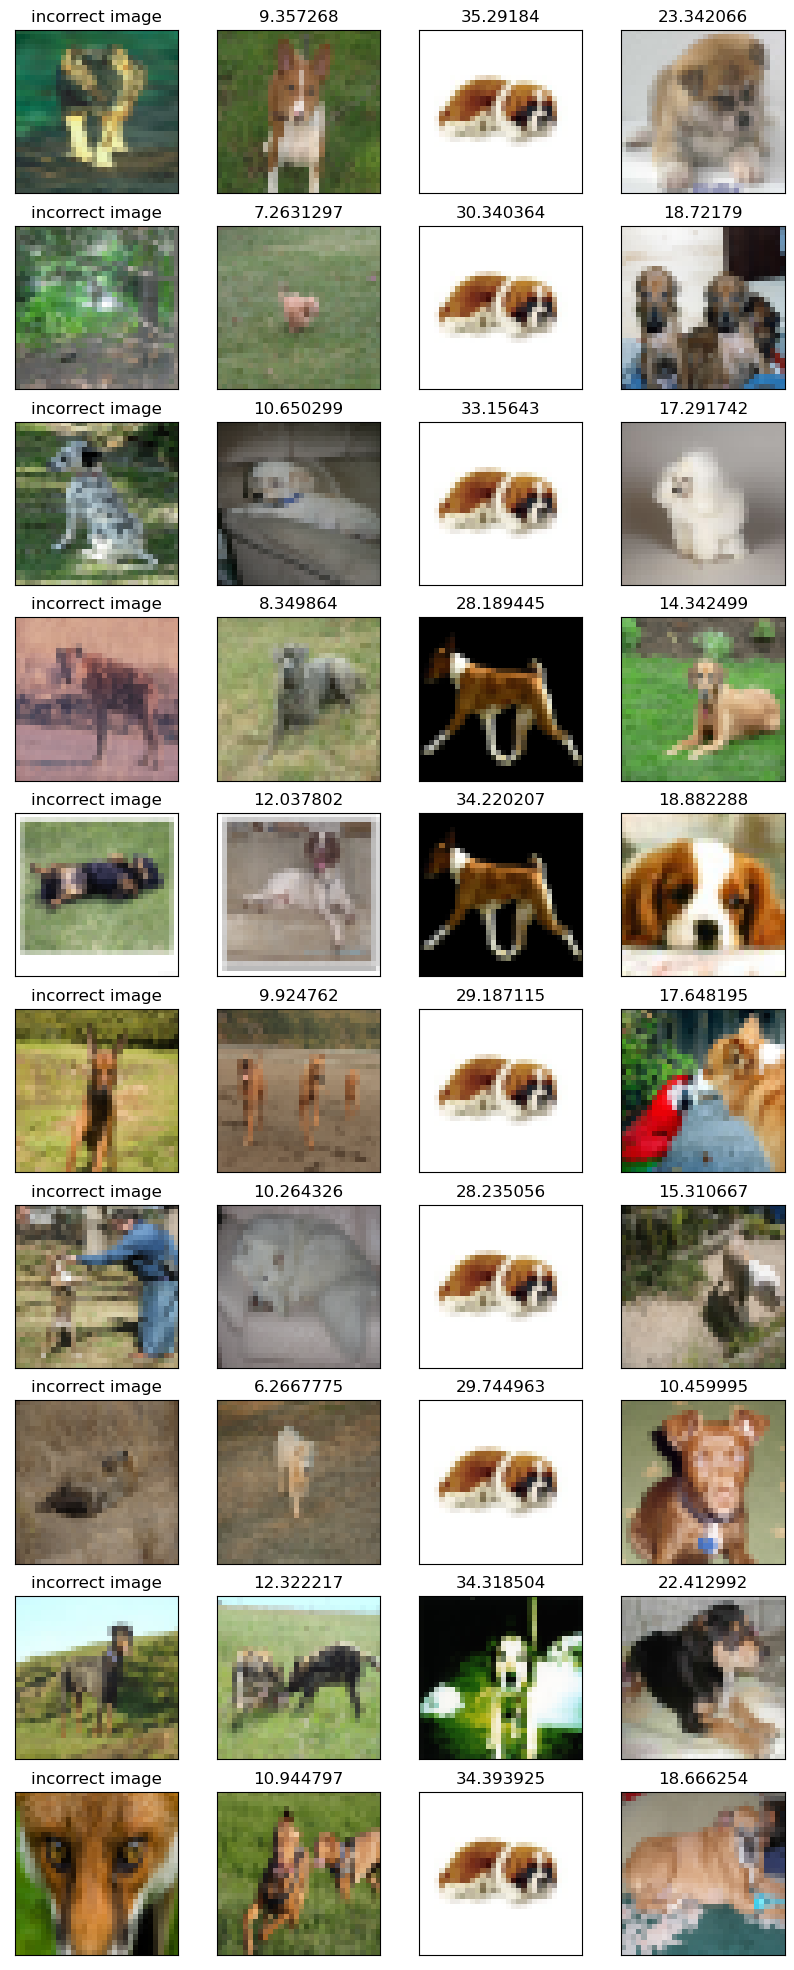

In [92]:
# Visualization
show_image_rows(
    images=image_rows,
    image_titles=label_rows)

In [107]:
# Save paths
save_edit_paths_dir = os.path.join('paths', 'edits', class_list[target_class])

    
# Save keys (incorrectly predicted)
save_keys_dir = os.path.join(save_edit_paths_dir, 'keys')
if not os.path.isdir(save_keys_dir):
    os.makedirs(save_keys_dir)
save_keys_path = os.path.join(save_keys_dir, 'key_image_paths.txt')
write_lists(save_keys_path, selected_incorrect_image_paths)
torch.save(selected_incorrect_images, os.path.join(save_keys_dir, 'key_images.pth'))

# Save values (correctly predicted)
save_values_dir = os.path.join(save_edit_paths_dir, 'values')
if not os.path.isdir(save_values_dir):
    os.makedirs(save_values_dir)
    
save_values_closest_path = os.path.join(save_values_dir, 'closest_values_image_paths.txt')
write_lists(save_values_closest_path, closest_correct_image_paths)
torch.save(closest_correct_images, os.path.join(save_values_dir, 'closest_value_images.pth'))

save_values_farthest_path = os.path.join(save_values_dir, 'farthest_values_image_paths.txt')
write_lists(save_values_farthest_path, farthest_correct_image_paths)
torch.save(farthest_correct_images, os.path.join(save_values_dir, 'farthest_value_images.pth'))

save_values_random_path = os.path.join(save_values_dir, 'random_values_image_paths.txt')
write_lists(save_values_random_path, random_correct_image_paths)
torch.save(random_correct_images, os.path.join(save_values_dir, 'random_value_images.pth'))

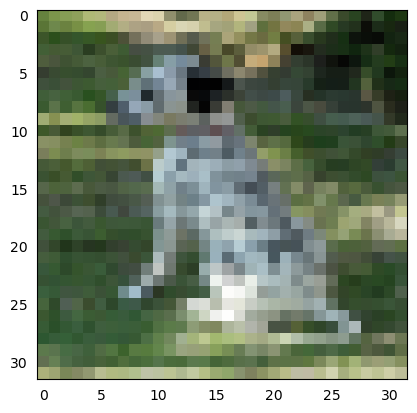

In [108]:
img = load_image('data/cinic-10-imagenet/train/dog/n02110341_7544.png')
show_image(img)